In [1]:
import numpy
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [2]:
# importing the datasets
training_dataset = datasets.MNIST(root = './data',
                                  train = True,
                                  transform = transforms.ToTensor(),
                                  download = True)

test_dataset = datasets.MNIST(root = './data',
                              train = False,
                              transform = transforms.ToTensor(),
                              download = True)

In [3]:
training_dataset.data.shape

torch.Size([60000, 28, 28])

In [4]:
image = training_dataset.data[0]
image.shape

torch.Size([28, 28])

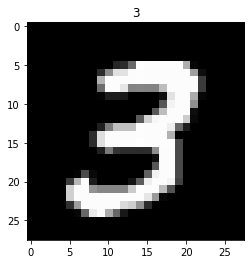

In [5]:
import matplotlib.pyplot as plt

# Visualizing training images
index = 7
image = training_dataset.data[index]
label = training_dataset.targets[index]
plt.imshow(image, cmap='gray')
plt.title(label.item())
plt.show()

In [6]:
# Spliting the training dataset into batches
training_dataloader = torch.utils.data.DataLoader(dataset = training_dataset,
                                                  batch_size = 100,
                                                  shuffle = True)

In [7]:
for images, labels in training_dataloader:
    print("Number of batches:", len(training_dataset)//images.shape[0])
    print(f"Each batch has: {images.shape[0]} images and {labels.shape[0]} labels.")
    print("Batch input shape:", images.shape)
    print("Batch output shape:", labels.shape)
    print("Image shape:", images[0].shape)
    print("Flatten shape:", images.view(-1, 784).shape)
    break

Number of batches: 600
Each batch has: 100 images and 100 labels.
Batch input shape: torch.Size([100, 1, 28, 28])
Batch output shape: torch.Size([100])
Image shape: torch.Size([1, 28, 28])
Flatten shape: torch.Size([100, 784])


In [8]:
# Defining the parameters
input_dim = 784      # 28 * 28
hidden_1_dim = 400   # approx. = (input_dim+output_dim)/2
hidden_2_dim = 400   # approx. = (input_dim+output_dim)/2
output_dim = 10      # 10 digits therfore 10 classes
lr = 0.001
epochs = 10

In [9]:
# Defining the network
class Model(nn.Module):
    def __init__(self, input_dim, hidden_1_dim, hidden_2_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_1_dim)
        self.fc2 = nn.Linear(hidden_1_dim, hidden_2_dim)
        self.fc3 = nn.Linear(hidden_2_dim, output_dim)
        self.relu = nn.ReLU()
    
    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [10]:
# Building the network
model = Model(input_dim, hidden_1_dim, hidden_2_dim, output_dim)

# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer function
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [11]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=10, bias=True)
  (relu): ReLU()
)>

In [12]:
# Training the network
for epoch in range(epochs):
    total_train = 0
    correct_train = 0
    for i, (images, labels) in enumerate(training_dataloader):
        images = images.view(-1, 784)
        
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        total_train += len(images)
        correct_train += (predictions == labels).sum()
        
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1)%100 == 0:
            print(f"Epoch: {epoch+1}/{epochs}, iteration: {i+1}/{len(training_dataset)//images.shape[0]}, loss: {loss:.3f}, \
                  accuracy: {(correct_train/total_train)*100:.2f}%")
        

Epoch: 1/10, iteration: 100/600, loss: 0.259,                   accuracy: 81.21%
Epoch: 1/10, iteration: 200/600, loss: 0.197,                   accuracy: 86.80%
Epoch: 1/10, iteration: 300/600, loss: 0.101,                   accuracy: 89.00%
Epoch: 1/10, iteration: 400/600, loss: 0.118,                   accuracy: 90.46%
Epoch: 1/10, iteration: 500/600, loss: 0.097,                   accuracy: 91.50%
Epoch: 1/10, iteration: 600/600, loss: 0.187,                   accuracy: 92.18%
Epoch: 2/10, iteration: 100/600, loss: 0.093,                   accuracy: 96.85%
Epoch: 2/10, iteration: 200/600, loss: 0.074,                   accuracy: 96.93%
Epoch: 2/10, iteration: 300/600, loss: 0.091,                   accuracy: 96.71%
Epoch: 2/10, iteration: 400/600, loss: 0.136,                   accuracy: 96.86%
Epoch: 2/10, iteration: 500/600, loss: 0.108,                   accuracy: 96.98%
Epoch: 2/10, iteration: 600/600, loss: 0.110,                   accuracy: 97.06%
Epoch: 3/10, iteration: 100/

In [13]:
# Calculating testing accuracy
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100)

correct_preds = 0
for images, labels in test_loader:
    images = images.view(-1, 784)
    _, predictions = torch.max(model(images), 1)
    correct_preds += (predictions == labels).sum()

print("Accuracy: {:.2f}%".format(correct_preds/len(test_dataset)*100.0))

Accuracy: 97.26%


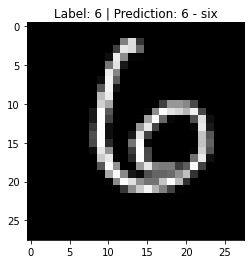

In [14]:
# Visualzing the prediction
index = 100
_, prediction = torch.max(model(test_dataset.data[index].float().view(-1, 784)), 1)
plt.imshow(test_dataset.data[index], cmap='gray')
plt.title(f'Label: {test_dataset.targets[index]} | Prediction: {test_dataset.classes[prediction]}')
plt.show()